# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.11.0'

In [3]:
tf.keras.__version__

'2.11.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

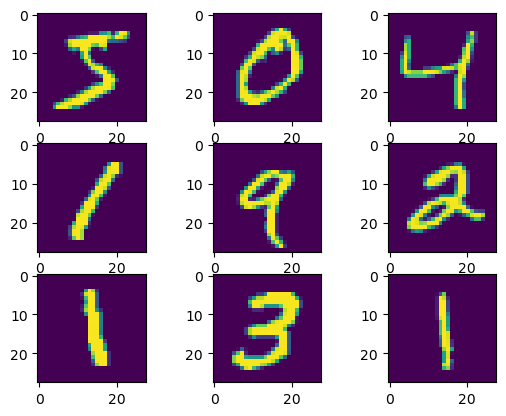

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [5]:
# Data Preprocessing
X_train_full, X_test = X_train_full/255.0, X_test/255.0

# Reserve 10,000 samples for validation
X_val = X_train_full[-10000:]
y_val = y_train_full[-10000:]
X_train = X_train_full[:-10000]
y_train = y_train_full[:-10000]

In [6]:
# TODO: Build your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

model.evaluate(X_val, y_val, verbose=1, batch_size=1024)

Epoch 1/20
98/98 [==============================] - 2s 9ms/step - loss: 0.4993 - accuracy: 0.8571 - val_loss: 0.1929 - val_accuracy: 0.9456
Epoch 2/20
98/98 [==============================] - 1s 8ms/step - loss: 0.1855 - accuracy: 0.9447 - val_loss: 0.1333 - val_accuracy: 0.9619
Epoch 3/20
98/98 [==============================] - 1s 7ms/step - loss: 0.1312 - accuracy: 0.9613 - val_loss: 0.1035 - val_accuracy: 0.9700
Epoch 4/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0993 - accuracy: 0.9702 - val_loss: 0.0933 - val_accuracy: 0.9721
Epoch 5/20
98/98 [==============================] - 1s 7ms/step - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0880 - val_accuracy: 0.9743
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - loss: 0.0630 - accuracy: 0.9813 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 7/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0546 - accuracy: 0.9836 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 8/20
98/98 [=

[0.07919207215309143, 0.9811999797821045]

In [7]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trai

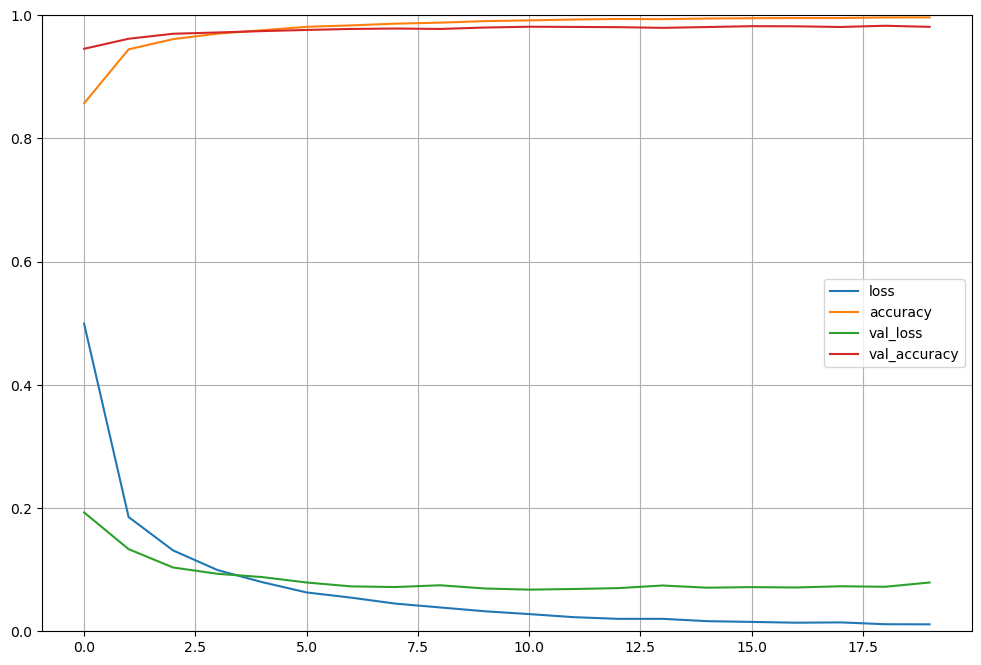

In [8]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [9]:
model.save('FDS22-M040-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [10]:
model = keras.models.load_model("FDS22-M040-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9803


[0.0703747570514679, 0.9803000092506409]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

I start by building an input layer that accepts a 28x28 input tensor, which is the size of MNIST images. The input images are then sent via two 256-neuron-wide hidden layers with RELU activations. To categorize the data, I utilized a softmax layer with 10 units; each unit represents a digit from 0 to 9. I also used dropout at a rate of 0.1 to avoid the model from overfitting too much.

I then train the model using 20 epochs, because I found that 20 epochs is enough for the model to reach the accuracy of 98\%. For each epoch, the batch size is set to 512.